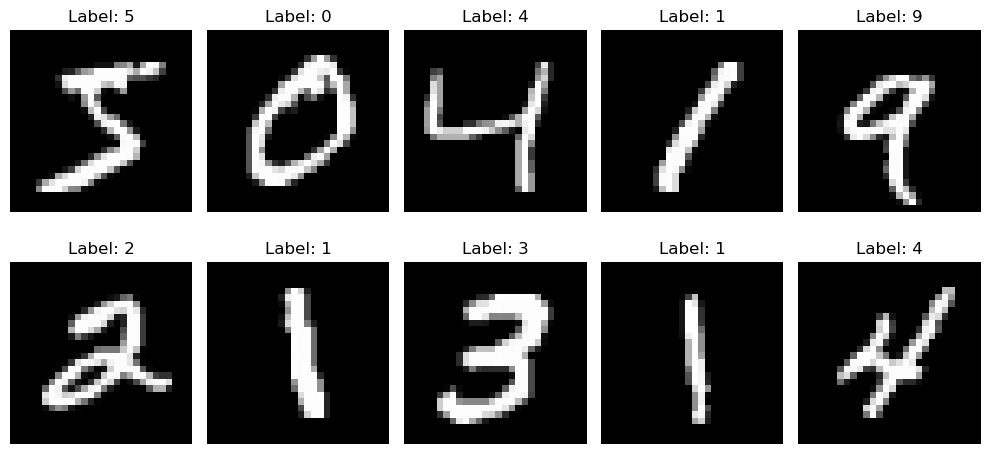

In [2]:
# 1- Load and preprocess (data normalization) the MNIST dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time

# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# visualize the data 10 first images 
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()


# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images (from 28x28 to 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)



In [3]:
print("Training data shape:", X_train.shape)  
print("Test data shape:", X_test.shape)      
print("Unique labels:", set(y_train))     


Training data shape: (60000, 784)
Test data shape: (10000, 784)
Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [4]:
# 2- Split the train set into Train and validations sets (20% for validation).
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [5]:
# 3 - Design an MLP architecture using Keras
# One input layer (784 neurons, flattened input).
# Two hidden layers (128 and 64 neurons) with ReLU activation.
# One output layer (10 neurons for classification, softmax activation).
# Cross-entropy loss function.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define a function to create a model with a given optimizer
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    return model

# Create models with different SGD methods
modelSGD = create_model()           # Standard SGD
modelSGDMini = create_model()       # Mini-batch SGD
modelSGDFull = create_model()       # Full-batch SGD
modelSGDdecay = create_model()       # SGD decay
modelSGDmomentum = create_model()       # SGD momentum
modelSGDadam = create_model()       # rmsprop
modelSGDrmsprop = create_model()       # rmsprop


c:\Users\TRETEC\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
training_times = {}
histories = {}

In [7]:
# 4- Train the model with different SGD strategies
# SGD
# Mini-batch SGD (batch size = 64)
# Batch SGD (full batch)
# Train for 50 epochs with a learning rate of 0.01.

from tensorflow.keras.optimizers import SGD

# Standard SGD
sgd_optimizer = SGD(learning_rate=0.01)
modelSGD.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_sgd = modelSGD.fit(X_train, y_train, epochs=5, batch_size=1, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["SGD"] = end_time - start_time
histories["SGD"] = history_sgd



Epoch 1/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 289s 6ms/step - accuracy: 0.8757 - loss: 0.3907 - val_accuracy: 0.9579 - val_loss: 0.1403
Epoch 2/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 272s 6ms/step - accuracy: 0.9636 - loss: 0.1193 - val_accuracy: 0.9657 - val_loss: 0.1148
Epoch 3/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 257s 5ms/step - accuracy: 0.9739 - loss: 0.0830 - val_accuracy: 0.9672 - val_loss: 0.1138
Epoch 4/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 121s 3ms/step - accuracy: 0.9795 - loss: 0.0635 - val_accuracy: 0.9669 - val_loss: 0.1130
Epoch 5/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 160s 3ms/step - accuracy: 0.9840 - loss: 0.0506 - val_accuracy: 0.9670 - val_loss: 0.1143


In [8]:
# Mini-batch SGD
sgd_mini_batch = SGD(learning_rate=0.01)
modelSGDMini.compile(optimizer=sgd_mini_batch, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_mini = modelSGDMini.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["Mini-batch SGD"] = end_time - start_time
histories["Mini-batch SGD"] = history_mini


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5784 - loss: 1.4934 - val_accuracy: 0.8762 - val_loss: 0.4653
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8812 - loss: 0.4271 - val_accuracy: 0.9024 - val_loss: 0.3471
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9028 - loss: 0.3408 - val_accuracy: 0.9148 - val_loss: 0.3038
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9134 - loss: 0.2999 - val_accuracy: 0.9208 - val_loss: 0.2778
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9212 - loss: 0.2774 - val_accuracy: 0.9263 - val_loss: 0.2586
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9271 - loss: 0.2544 - val_accuracy: 0.9301 - val_loss: 0.2430
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9342 - loss: 0.2327 - val_accuracy: 0.9344 - val_loss: 0.2288
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9359 - loss: 0.2232 - val_accuracy: 0

In [9]:
# Batch SGD (Full batch)
sgd_batch = SGD(learning_rate=0.01)
modelSGDFull.compile(optimizer=sgd_batch, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_batch = modelSGDFull.fit(X_train, y_train, epochs=50, batch_size=len(X_train), validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["Batch SGD"] = end_time - start_time
histories["Batch SGD"] = history_batch


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step - accuracy: 0.1135 - loss: 2.3487 - val_accuracy: 0.1166 - val_loss: 2.3321
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.1166 - loss: 2.3385 - val_accuracy: 0.1195 - val_loss: 2.3226
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.1200 - loss: 2.3288 - val_accuracy: 0.1214 - val_loss: 2.3134
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.1238 - loss: 2.3194 - val_accuracy: 0.1261 - val_loss: 2.3045
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.1275 - loss: 2.3103 - val_accuracy: 0.1296 - val_loss: 2.2959
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.1322 - loss: 2.3015 - val_accuracy: 0.1335 - val_loss: 2.2876
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.1364 - loss: 2.2931 - val_accuracy: 0.1389 - val_loss: 2.2796
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.1413 - loss: 2.2848 - val_accuracy: 0.1438 - val_loss:

In [10]:
# 5- Compare training time and learning curves for different SGD variants
sgd_decay = SGD(learning_rate=0.01, decay=1e-6)
sgd_momentum = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)

modelSGDdecay.compile(optimizer=sgd_decay, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train models with decay and momentum
start_time = time.time()
history_sgd_decay = modelSGDdecay.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["SGD decay"] = end_time - start_time
histories["SGD decay"] = history_sgd_decay

modelSGDmomentum.compile(optimizer=sgd_momentum, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ---------
start_time = time.time()
history_sgd_momentum = modelSGDmomentum.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["SGD momentum"] = end_time - start_time
histories["SGD momentum"] = history_sgd_momentum

Epoch 1/50


c:\Users\TRETEC\miniconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5804 - loss: 1.4653 - val_accuracy: 0.8772 - val_loss: 0.4573
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8852 - loss: 0.4217 - val_accuracy: 0.9027 - val_loss: 0.3480
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9064 - loss: 0.3302 - val_accuracy: 0.9153 - val_loss: 0.3030
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9160 - loss: 0.2949 - val_accuracy: 0.9220 - val_loss: 0.2750
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9245 - loss: 0.2635 - val_accuracy: 0.9277 - val_loss: 0.2565
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9296 - loss: 0.2455 - val_accuracy: 0.9328 - val_loss: 0.2392
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9329 - loss: 0.2373 - val_accuracy: 0.9349 - val_loss: 0.2298
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9385 - loss: 0.2157 - val_accuracy: 0.9390 - val_

In [11]:
# 6. Compare different optimizers (SGD, Adam, RMSProp)
from tensorflow.keras.optimizers import Adam, RMSprop

# Adam optimizer
adam_optimizer = Adam(learning_rate=0.001)
modelSGDadam.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_adam = modelSGDadam.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["Adam"] = end_time - start_time
histories["Adam"] = history_adam


# RMSProp optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.001)
modelSGDrmsprop.compile(optimizer=rmsprop_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_rmsprop = modelSGDrmsprop.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["RMSProp"] = end_time - start_time
histories["RMSProp"] = history_rmsprop


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8422 - loss: 0.5481 - val_accuracy: 0.9546 - val_loss: 0.1616
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9596 - loss: 0.1406 - val_accuracy: 0.9639 - val_loss: 0.1221
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9734 - loss: 0.0918 - val_accuracy: 0.9647 - val_loss: 0.1115
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9791 - loss: 0.0695 - val_accuracy: 0.9712 - val_loss: 0.0933
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9850 - loss: 0.0504 - val_accuracy: 0.9713 - val_loss: 0.0961
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9879 - loss: 0.0375 - val_accuracy: 0.9755 - val_loss: 0.0852
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 0.9766 - val_loss: 0.0910
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.

In [12]:
import numpy as np
from tensorflow.keras.models import load_model

# Dictionary of pre-trained models
models = {
    "SGD": modelSGD,
    "Mini-batch SGD": modelSGDMini,
    "Full-batch SGD": modelSGDFull,
    "SGD Decay": modelSGDdecay,
    "SGD momentum": modelSGDmomentum,
    "Adam": modelSGDadam,
    "RMSProp": modelSGDrmsprop
}

best_val_acc = 0  # To track the highest validation accuracy
best_model_name = None  # To track the best model name
best_model = None  # To store the best model instance

# Evaluate each trained model on the validation set
for name, model in models.items():
    print(f"Evaluating {name} model...")
    
    # Get validation accuracy
    _, val_acc = model.evaluate(X_val, y_val, verbose=0)
    
    print(f"{name} validation accuracy: {val_acc:.4f}")
    
    # Check if this is the best model so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_name = name
        best_model = model  # Store the best model

# Save the best model
if best_model:
    print(f"\nBest model: {best_model_name} with validation accuracy: {best_val_acc:.4f}")
    best_model.save("best_mnist_model.h5")

# Load the best saved model for predictions
best_model = load_model("best_mnist_model.h5")

# Make predictions on test samples
predictions = best_model.predict(X_test[:5])
print("Predicted classes:", np.argmax(predictions, axis=1))


Evaluating SGD model...
SGD validation accuracy: 0.9670
Evaluating Mini-batch SGD model...
Mini-batch SGD validation accuracy: 0.9718
Evaluating Full-batch SGD model...
Full-batch SGD validation accuracy: 0.3861
Evaluating SGD Decay model...
SGD Decay validation accuracy: 0.9719
Evaluating SGD momentum model...
SGD momentum validation accuracy: 0.9778
Evaluating Adam model...
Adam validation accuracy: 0.9807
Evaluating RMSProp model...


RMSProp validation accuracy: 0.9819

Best model: RMSProp with validation accuracy: 0.9819


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Predicted classes: [7 2 1 0 4]


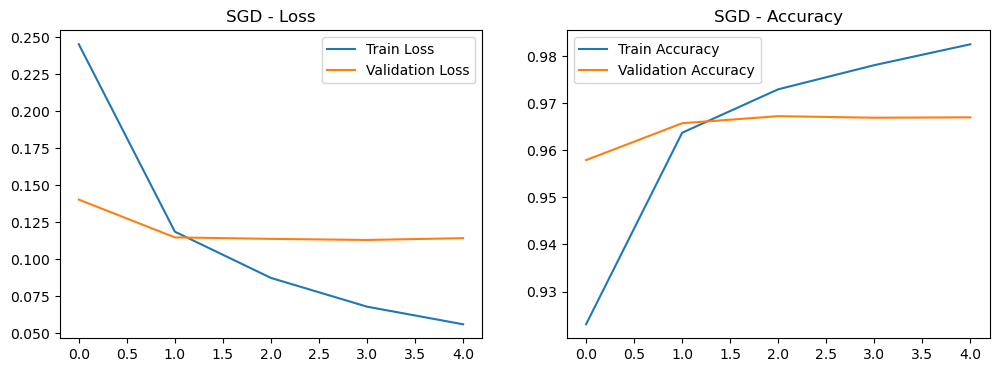

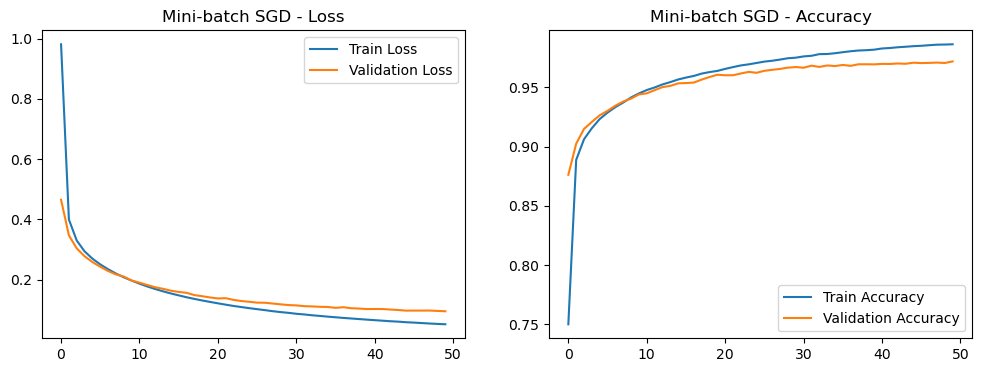

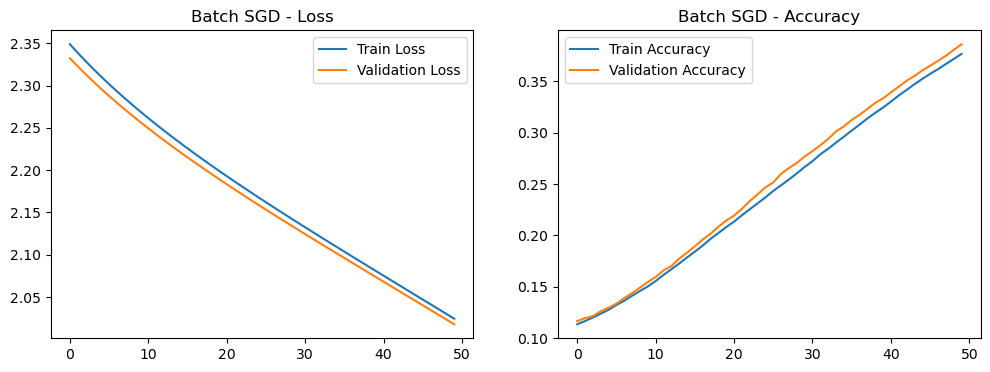

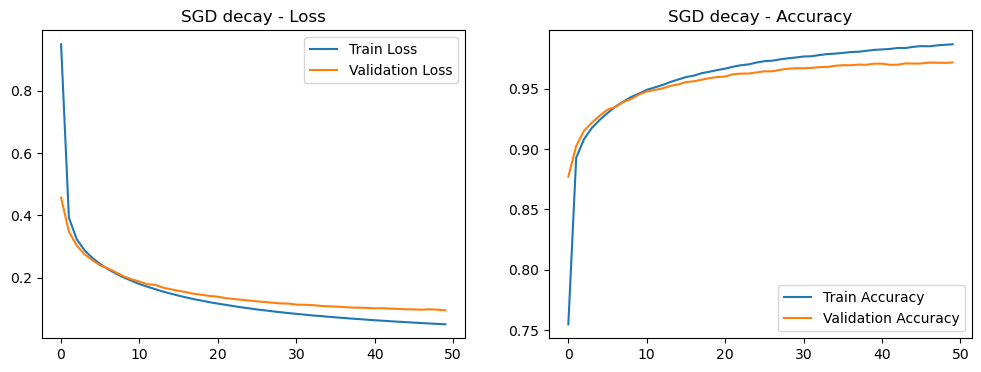

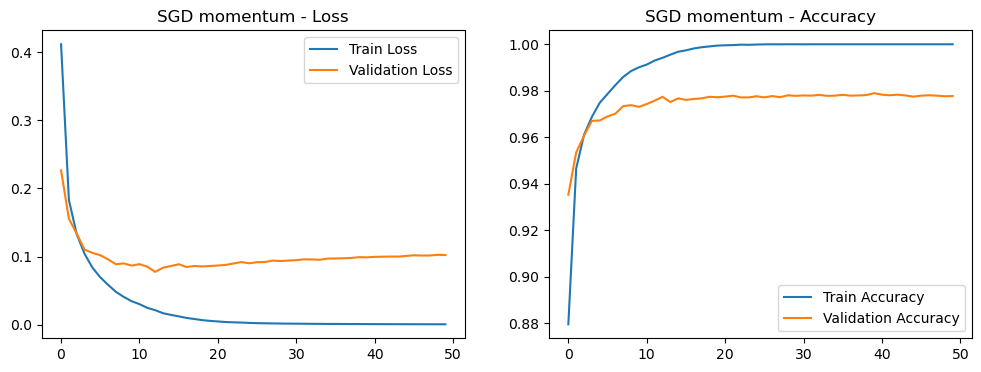

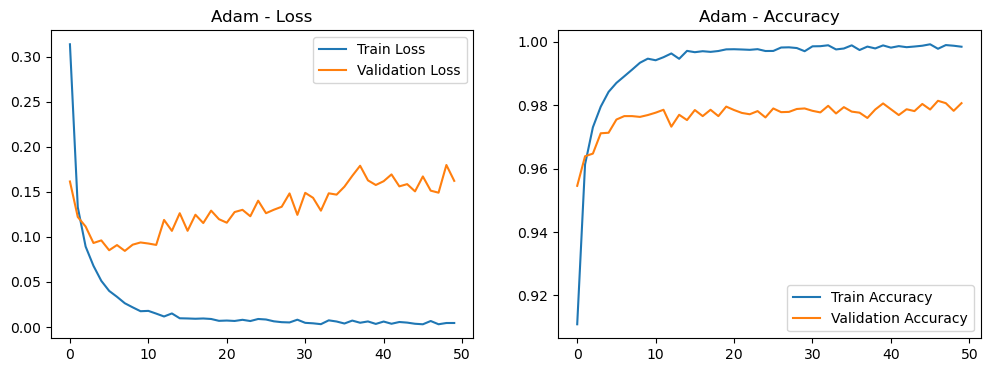

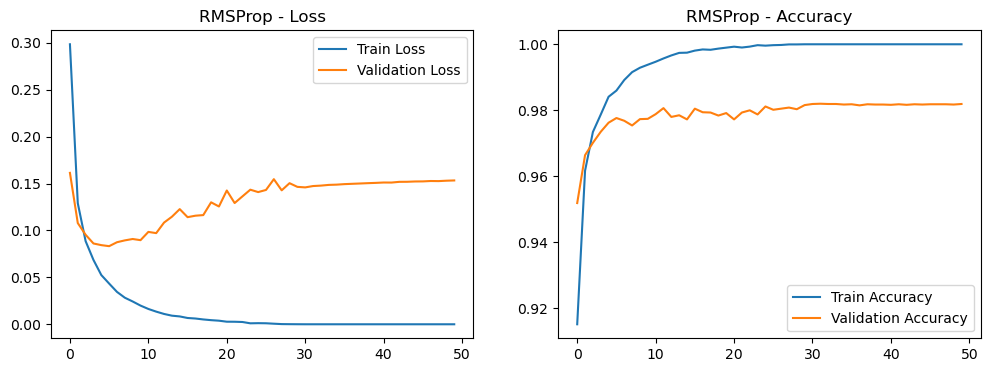

In [13]:
# 8. Present results (graphs, accuracy, running time)
import matplotlib.pyplot as plt

def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 4))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title + " - Loss")
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + " - Accuracy")
    plt.legend()
    
    plt.show()



plot_learning_curve(history_sgd, "SGD")
plot_learning_curve(history_mini, "Mini-batch SGD")
plot_learning_curve(history_batch, "Batch SGD")
plot_learning_curve(history_sgd_decay, "SGD decay")
plot_learning_curve(history_sgd_momentum, "SGD momentum")
plot_learning_curve(history_adam, "Adam")
plot_learning_curve(history_rmsprop, "RMSProp")


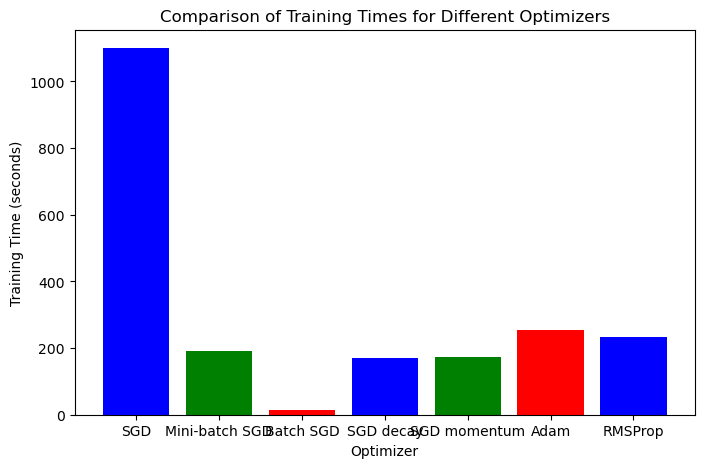

In [14]:
# Visualizing Training Time
plt.figure(figsize=(8, 5))
plt.bar(training_times.keys(), training_times.values(), color=['blue', 'green', 'red'])
plt.xlabel("Optimizer")
plt.ylabel("Training Time (seconds)")
plt.title("Comparison of Training Times for Different Optimizers")
plt.show()